# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [35]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [37]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [28]:
if response.status_code == 200:
    print("Successfully feteched data!")
    data = response.json()
else: 
    print(f"X Error: {response.status_code}")

Successfully feteched data!


In [13]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [32]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [31]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [40]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()
print(data.keys())


dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


In [41]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [43]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\JacquelynHopkins\AppData\Local\Temp\ipykernel_29816\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [19]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.319048,86.267857,0.136905
std,3.525764,12.804132,0.431063
min,0.400000,45.000000,0.000000
25%,5.875000,81.000000,0.000000
50%,8.200000,90.000000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


In [44]:
Observations the avg temp is 8.32C, variation is 3.53C, min of 0.4C and a max of 17.9C
New York is genrally cool but had temp that fluctuates


SyntaxError: invalid decimal literal (2648702765.py, line 1)

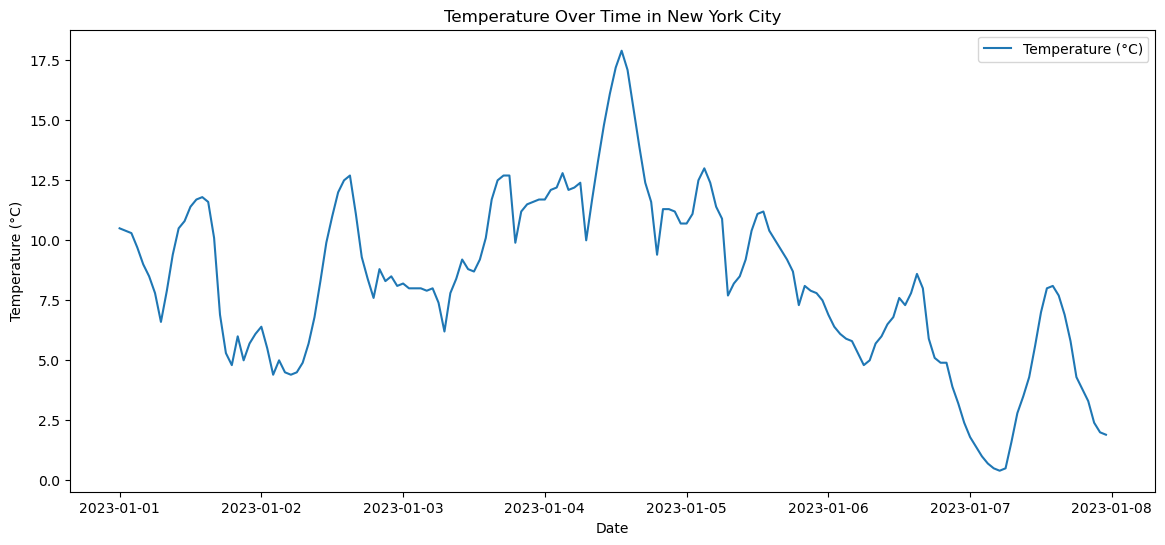

In [20]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

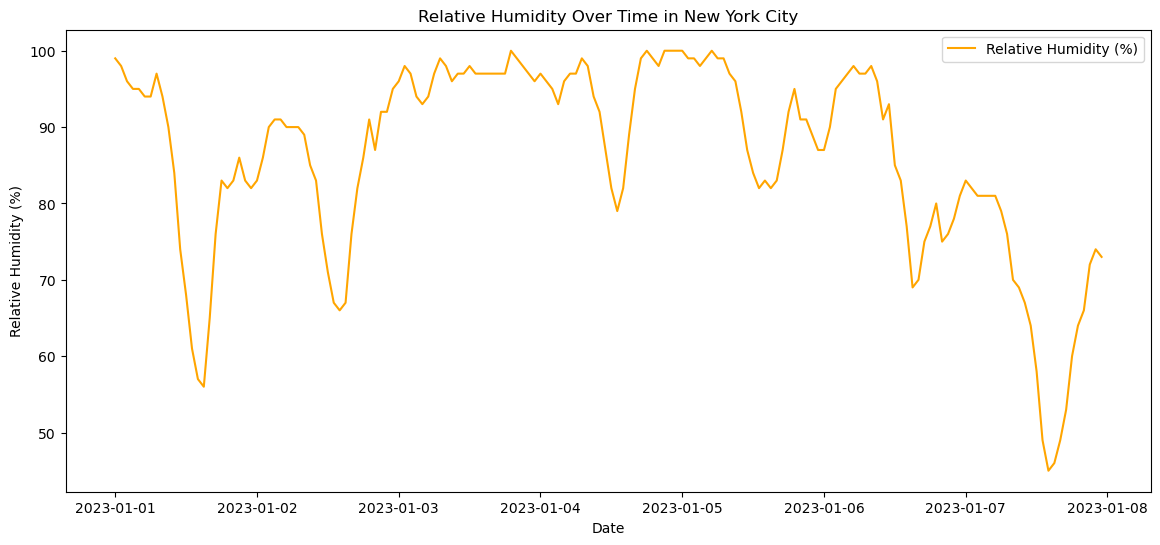

In [45]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


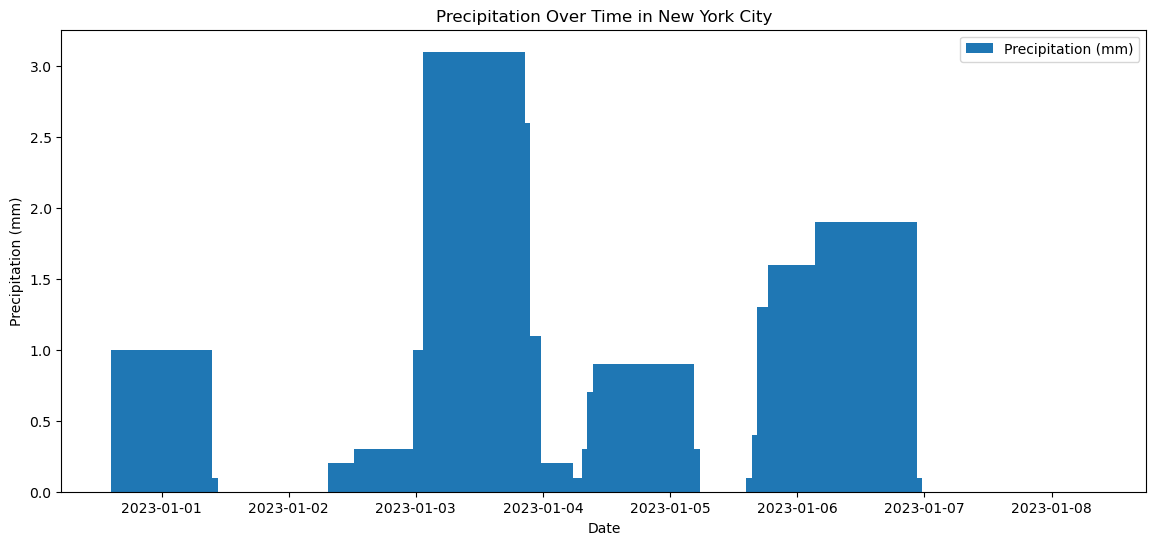

In [22]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [46]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


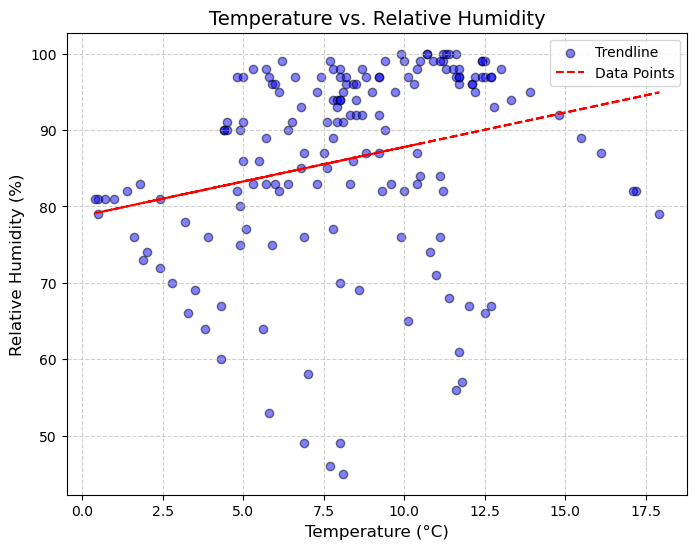

In [54]:
# Scatter Plot of Temperature vs. Relative Humidity
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5, color='blue', edgecolors='black')
m, b = np.polyfit(df['temperature_2m'], df['relativehumidity_2m'],1)
plt.plot(df['temperature_2m'], m*df['temperature_2m'] + b, color='red', linestyle='--', label='Trendline')
plt.title('Temperature vs. Relative Humidity', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.legend(['Trendline', 'Data Points'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [55]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
print("Preview of Daily Average Data:")
print(daily_avg.head())


Preview of Daily Average Data:
            temperature_2m  relativehumidity_2m  precipitation
time                                                          
2023-01-01        8.658333            83.000000       0.045833
2023-01-02        7.858333            84.000000       0.025000
2023-01-03        9.558333            96.916667       0.391667
2023-01-04       12.954167            94.333333       0.095833
2023-01-05        9.783333            92.125000       0.000000


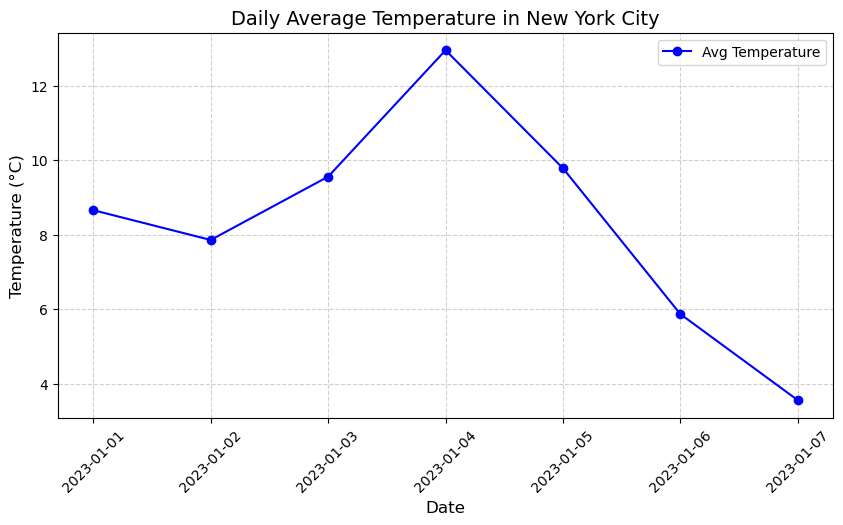

In [56]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o', linestyle='-', color='blue', label='Avg Temperature')
plt.title('Daily Average Temperature in New York City', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [61]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)
if response_la.status_code ==200:
    print(" Successfully fetched Los Angeles weather data!")
    data_la = response_la.json()
    hourly_data_la = data_la['hourly']
    df_la = pd.DataFrame(hourly_data_la)
    df_la['time'] = pd.to_datetime(df_la['time'])
    df_la.set_index('time', inplace=True)
    df_la.ffill(inplace=True)
else:
    print(f"X Failed to fetch Los Angeles data. Status Code: {response_la.status_code}")
    


# Load and clean Los Angeles data



 Successfully fetched Los Angeles weather data!


In [63]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()
print("Preview of Los Angeles Daily Average Data:")
print(daily_avg_la.head())


Preview of Los Angeles Daily Average Data:
            temperature_2m  relativehumidity_2m  precipitation
time                                                          
2023-01-01       12.233333            73.666667       0.120833
2023-01-02        9.495833            78.333333       0.079167
2023-01-03       11.970833            83.875000       0.279167
2023-01-04       13.775000            93.250000       0.787500
2023-01-05       11.950000            91.041667       1.258333


In [64]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})
print("Preview of Combined Temperature Data:")
print(combined_temp.head())

Preview of Combined Temperature Data:
             New York  Los Angeles
time                              
2023-01-01   8.658333    12.233333
2023-01-02   7.858333     9.495833
2023-01-03   9.558333    11.970833
2023-01-04  12.954167    13.775000
2023-01-05   9.783333    11.950000


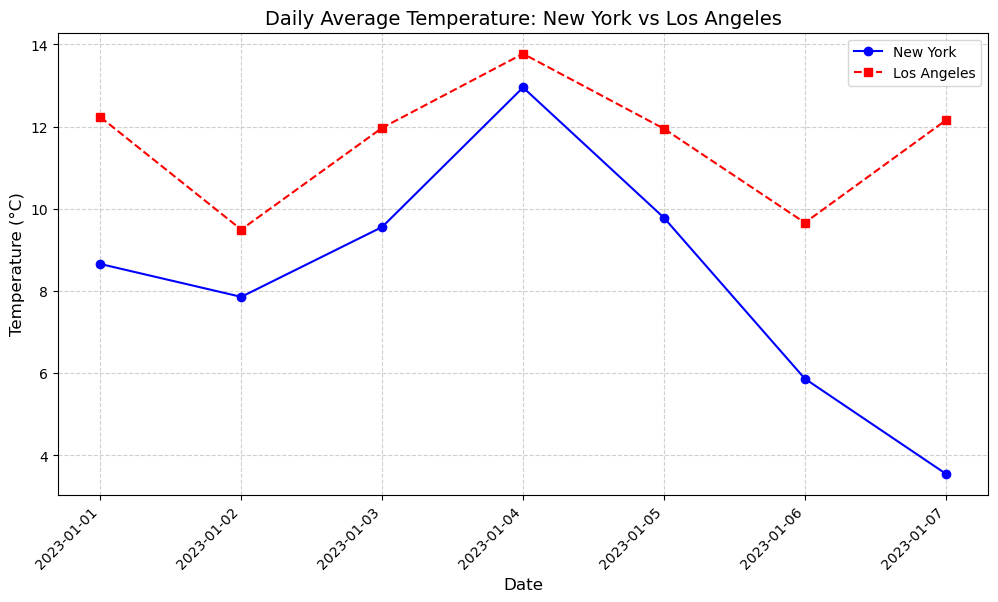

In [66]:
# Plot Comparison of Daily Average Temperature
plt.figure(figsize=(12,6))
plt.plot(combined_temp.index, combined_temp['New York'], marker='o', linestyle='-', label='New York', color='blue')
plt.plot(combined_temp.index, combined_temp['Los Angeles'], marker='s', linestyle='--', label='Los Angeles', color='red')

plt.title('Daily Average Temperature: New York vs Los Angeles', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [67]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
print("Preview of Temperature Difference:")
print(combined_temp.head())


Preview of Temperature Difference:
             New York  Los Angeles  Temp Difference
time                                               
2023-01-01   8.658333    12.233333         3.575000
2023-01-02   7.858333     9.495833         1.637500
2023-01-03   9.558333    11.970833         2.412500
2023-01-04  12.954167    13.775000         0.820833
2023-01-05   9.783333    11.950000         2.166667


In [70]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv', index=True)
print("New York weather data saved as 'new_york_weather.csv'")

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv', index=True)
print("Los Angeles weather data saved as 'los_angeles_weather.csv'")


New York weather data saved as 'new_york_weather.csv'
Los Angeles weather data saved as 'los_angeles_weather.csv'


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


##xercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!



l

In [76]:
import requests
import pandas as pd
base_url = "https://archive-api.open-meteo.com/v1/archive"
locations = {"London": {"latitude": 51.5074, "longitude": -0.1278}, "Seattle": {"latitude": 47.6062, "longitude": -122.3321}}
params = {"start_date": "2022-01-01",
          "end_date": "2022-12-31",
          "hourly": "precipitation",
          "timezone": "auto"}
weather_data = {}
for city, coords in locations.items():
    response = requests.get(base_url, params={**params, **coords})
    
    if response.status_code == 200:
        print(f"Successfully fetched data for {city}")
        weather_data[city] = response.json()["hourly"]
    else:
        print(f"Failed to fetch data for {city}. Status Code:{response.status_code}")
print("Data retrieval complete!")

Successfully fetched data for London
Successfully fetched data for Seattle
Data retrieval complete!


In [78]:
df_london = pd.DataFrame(weather_data["London"])
df_seattle = pd.DataFrame(weather_data["Seattle"])

df_london['time'] =pd.to_datetime(df_london['time'])
df_seattle['time'] = pd.to_datetime(df_seattle['time'])

df_london.set_index('time', inplace=True)
df_seattle.set_index('time', inplace=True)

print("Preview of London Precipitation Data:")
print(df_seattle.head())
            

Preview of London Precipitation Data:
                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0


In [80]:
daily_precip_london = df_london.resample('D'). sum()
daily_precip_seattle = df_seattle.resample('D').sum()
print("Preview of Daily Precipitation Data - London:")
print(daily_precip_london.head())
print("\nPreview of Daily Precipitation Data - Seattle:")
print(daily_precip_seattle.head())

Preview of Daily Precipitation Data - London:
            precipitation
time                     
2022-01-01            0.2
2022-01-02            2.0
2022-01-03            0.0
2022-01-04            2.5
2022-01-05            0.0

Preview of Daily Precipitation Data - Seattle:
            precipitation
time                     
2022-01-01            0.0
2022-01-02           38.3
2022-01-03           17.1
2022-01-04            2.5
2022-01-05            9.6


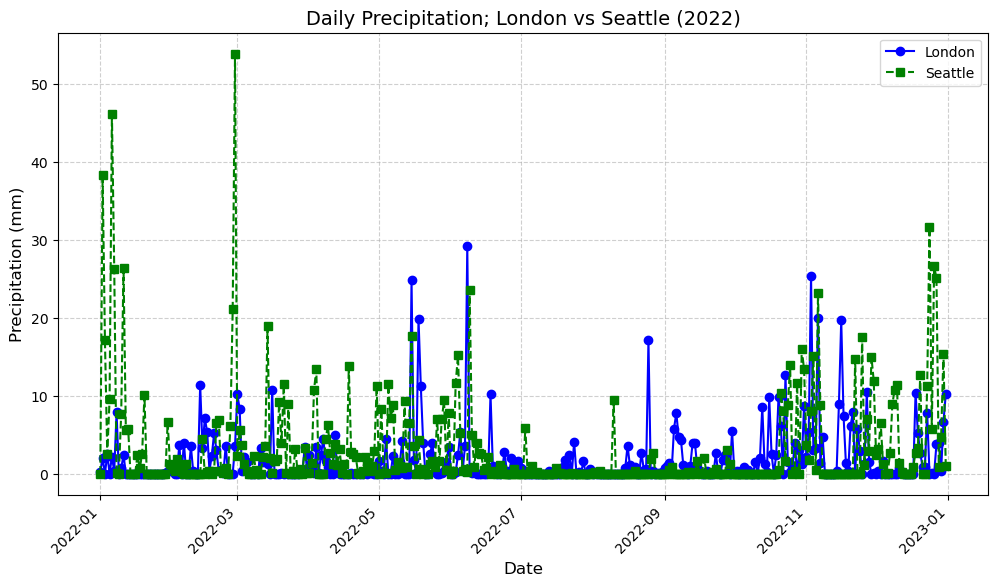

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(daily_precip_london.index, daily_precip_london['precipitation'], marker='o', linestyle='-', label='London', color='blue')
plt.plot(daily_precip_seattle.index, daily_precip_seattle['precipitation'], marker='s', linestyle='--', label='Seattle', color='green')
plt.title('Daily Precipitation; London vs Seattle (2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
         

In [90]:
monthly_precip_london = daily_precip_london.resample('M').mean()
monthly_precip_seattle = daily_precip_seattle.resample('M').mean()

print("Preview of Monthly Precipitation Data - London:")
print(monthly_precip_london.head())
print("\nPreview of Monthly Precipitation Data - Seattle:")
print(monthly_precip_seattle.head())

Preview of Monthly Precipitation Data - London:
            precipitation
time                     
2022-01-31       0.612903
2022-02-28       2.082143
2022-03-31       1.474194
2022-04-30       0.743333
2022-05-31       2.848387

Preview of Monthly Precipitation Data - Seattle:
            precipitation
time                     
2022-01-31       6.748387
2022-02-28       3.785714
2022-03-31       2.822581
2022-04-30       3.020000
2022-05-31       3.858065


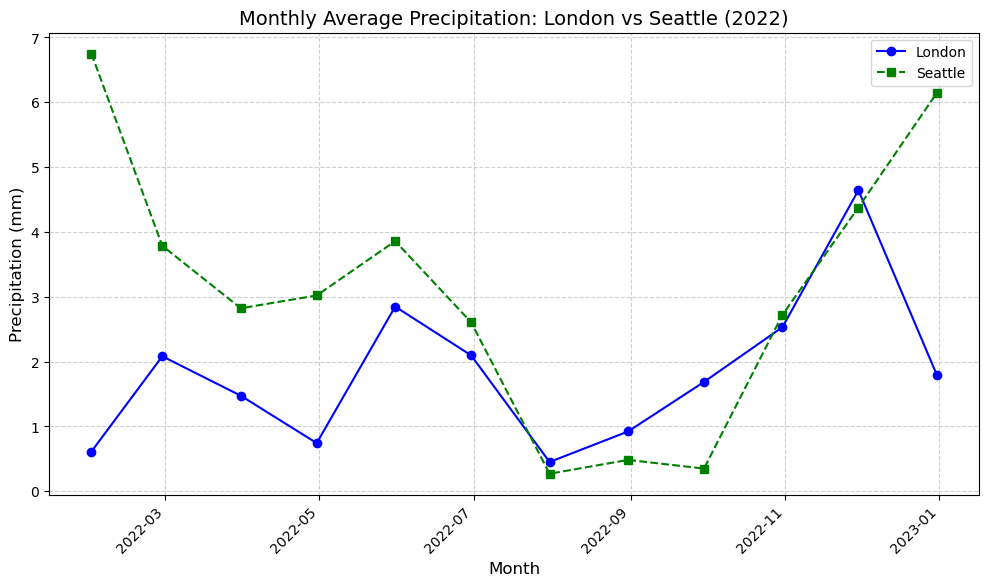

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(monthly_precip_london.index, monthly_precip_london['precipitation'], marker='o', linestyle='-', label='London', color='blue')
plt.plot(monthly_precip_seattle.index, monthly_precip_seattle['precipitation'], marker='s', linestyle='--', label='Seattle', color='green')

plt.title('Monthly Average Precipitation: London vs Seattle (2022)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

In [ ]:
Seattle receives more rainfall than London in most months
The highest rainfall for seattle occurs at the beginning and end of the year

London experiences more stable rainfall throughout the year 
Seattle has a sharp drop and spikes, London precipitation remains more evenly distributed

Both cities have a dry period around July-August
Rainfall in both London and Seattle is lowest around July-August. This suggest that summer is the driest season for both locations.

In [100]:
summary_london = monthly_precip_london.describe()
summary_seattle = monthly_precip_seattle.describe()

print("Summary Statistics: London")
print(summary_london)

print("\nSummary Statistics: Seattle")
print(summary_seattle)

Summary Statistics: London
       precipitation
count      12.000000
mean        1.823969
std         1.172153
min         0.451613
25%         0.877769
50%         1.740108
75%         2.205565
max         4.643333

Summary Statistics: Seattle
       precipitation
count      12.000000
mean        3.099222
std         2.091926
min         0.270968
25%         2.075968
50%         2.921290
75%         3.987715
max         6.748387


In [ ]:
London:1.82month
Seattle 3.10/month
seattle recieves nearly twice as much rainful as London on an avg month
Londons max4.64
Seattle mx 6.75 Seattle has more extreme rainfall events than London

London std 1.17
Seattle std 2.09
Seattle has a much higher std than London meaning that seattle monthly rainfall varies more significantly from month to month
Londons rainfall is more consistent throughout the year, while seatlle experience larger swings bewteen dry and wet months.

In [98]:
wettest_month_london = monthly_precip_london['precipitation'].idxmax()
driest_month_london = monthly_precip_london['precipitation'].idxmin()

wettest_month_seattle = monthly_precip_seattle['precipitation'].idxmax()
driest_month_seattle = monthly_precip_seattle['precipitation'].idxmin()

print("Wettest & Driest Months:")
print(f"London - Wettest Month: {wettest_month_london.strftime('%B %Y')}, Precipitation: {monthly_precip_london.loc[wettest_month_london, 'precipitation']:.2f} mm")
print(f"London - Driest Month: {driest_month_london.strftime('%B %Y')}, Precipitation: {monthly_precip_london.loc[driest_month_london, 'precipitation']:.2f} mm")
print(f"Seattle - Wettest Month: {wettest_month_seattle.strftime('%B %Y')}, Precipitation: {monthly_precip_seattle.loc[wettest_month_seattle, 'precipitation']:.2f} mm")
print(f"Seattle - Driest Month: {driest_month_seattle.strftime('%B %Y')}, Precipitation : {monthly_precip_seattle.loc[driest_month_seattle, 'precipitation']:.2f} mm")

Wettest & Driest Months:
London - Wettest Month: November 2022, Precipitation: 4.64 mm
London - Driest Month: July 2022, Precipitation: 0.45 mm
Seattle - Wettest Month: January 2022, Precipitation: 6.75 mm
Seattle - Driest Month: July 2022, Precipitation : 0.27 mm


In [ ]:
Seattles wettest month is January, while London's is November
Seattle recieves the most rainfall in Jan-6.75mm avg/day) rainy winter season
Londons wettest month is in November (4.64mm avg/day) indicating that late autumn is the peak of rainy seaon

Both cities experience their driest month in july
London (0.45 mm avg/day) and Seattle (0.27 mm avg/day) recieve the least rain in July. July is the driest month for both cities, likely due to summer weather patterns